In [463]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

In [464]:
#NORMALIZADA
#df = pd.read_csv("dataset/dfRed.csv", sep = ';')

#ORIGINAL
df = pd.read_csv("dataset/winequality-red.csv", sep = ';')

In [465]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

colunas = df.columns

#PADRONIZAR
scaler_standard = StandardScaler()
dfPadronizado = pd.DataFrame(scaler_standard.fit_transform(df), columns = colunas)

#NORMALIZAR
scaler_minMax = MinMaxScaler()
dfNormalizado  = pd.DataFrame(scaler_minMax.fit_transform(dfPadronizado), columns=colunas)



display(df)
display(dfPadronizado)




,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,-0.787823
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,-0.787823
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,0.450848
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.217796,0.403229,-0.980669,-0.382271,0.053845,1.542054,-0.075043,-0.978765,0.899886,-0.461180,0.072294,-0.787823
1595,-1.390155,0.123905,-0.877968,-0.240375,-0.541259,2.211469,0.137820,-0.862162,1.353436,0.601055,0.729364,0.450848
1596,-1.160343,-0.099554,-0.723916,-0.169427,-0.243707,1.255161,-0.196679,-0.533554,0.705508,0.542042,0.541630,0.450848
1597,-1.390155,0.654620,-0.775267,-0.382271,-0.264960,1.542054,-0.075043,-0.676657,1.677400,0.305990,-0.209308,-0.787823


In [466]:


X = df.drop('quality', axis=1).values  # Features são todas as colunas exceto a coluna 'quality'
y = df['quality'].values  # TARGET TEM Q SER EM INTEIRO
display(y)

a = dfPadronizado['quality'].values
display(a)





array([5, 5, 5, ..., 6, 5, 6])

array([-0.78782264, -0.78782264, -0.78782264, ...,  0.45084835,
       -0.78782264,  0.45084835])

In [467]:

# Dividir os dados em conjuntos de treinamento e teste
# X_train: Conjunto de features para treinamento
# X_test: Conjunto de features para teste
# y_train: Conjunto de targets para treinamento
# y_test: Conjunto de targets para teste

# random_state: Semente usada pelo gerador de números aleatórios 
# para garantir reprodutibilidade nos resultados. 
# O valor "1" é usado aqui como exemplo, mas você pode usar qualquer 
# número inteiro ou deixar esse parâmetro em branco para obter uma semente aleatória.

# test_size: Tamanho do conjunto de teste em relação ao conjunto total de dados. 
# Nesse exemplo, o conjunto de teste terá 75% dos dados e o conjunto de treinamento terá 25%. 
# O valor deve ser um número entre 0 e 1, representando a proporção do 
# conjunto de teste em relação ao conjunto total de dados.

X_train, X_test, y_train, y_test= train_test_split(X, y, random_state=1, test_size=.25)

print('Quantidade de dados de treino:', X_train.shape) 
print('Quantidade de dados de teste:', X_test.shape) 

print(y_train)

Quantidade de dados de treino: (1199, 11)
Quantidade de dados de teste: (400, 11)
[5 4 5 ... 6 6 8]


In [468]:
clf = MLPClassifier(
    verbose=True,      # Se True, o modelo exibirá informações sobre o processo de treinamento.
    max_iter=500,      # Número máximo de iterações (épocas) para o treinamento do modelo.
    tol=0.0000001,     # Tolerância para critério de parada. O treinamento para se a perda (loss) não diminuir por pelo menos tol nas últimas duas épocas.
    activation="relu", # Função de ativação a ser usada nas camadas ocultas. "relu" representa a função retificação linear (ReLU).
    solver='adam'      # O otimizador usado para ajustar os pesos do modelo. "adam" representa o otimizador Adam.
).fit(X_train, y_train)

Iteration 1, loss = 5.83282733
Iteration 2, loss = 2.80250077
Iteration 3, loss = 2.55198869
Iteration 4, loss = 2.01876348
Iteration 5, loss = 1.85566521
Iteration 6, loss = 1.56267548
Iteration 7, loss = 1.47683585
Iteration 8, loss = 1.35594050
Iteration 9, loss = 1.30051565
Iteration 10, loss = 1.27253047
Iteration 11, loss = 1.23989116
Iteration 12, loss = 1.21595681
Iteration 13, loss = 1.20516144
Iteration 14, loss = 1.19810009
Iteration 15, loss = 1.18348052
Iteration 16, loss = 1.17535203
Iteration 17, loss = 1.16647152
Iteration 18, loss = 1.16172758
Iteration 19, loss = 1.15621221
Iteration 20, loss = 1.15074990
Iteration 21, loss = 1.15187420


Iteration 22, loss = 1.14783320
Iteration 23, loss = 1.14016278
Iteration 24, loss = 1.13948005
Iteration 25, loss = 1.13250487
Iteration 26, loss = 1.12877351
Iteration 27, loss = 1.12561226
Iteration 28, loss = 1.12166153
Iteration 29, loss = 1.11838441
Iteration 30, loss = 1.11654580
Iteration 31, loss = 1.11310924
Iteration 32, loss = 1.11950254
Iteration 33, loss = 1.11975400
Iteration 34, loss = 1.12427423
Iteration 35, loss = 1.11841755
Iteration 36, loss = 1.10955958
Iteration 37, loss = 1.11328056
Iteration 38, loss = 1.11372501
Iteration 39, loss = 1.10856112
Iteration 40, loss = 1.10654574
Iteration 41, loss = 1.09725933
Iteration 42, loss = 1.09225777
Iteration 43, loss = 1.08803413
Iteration 44, loss = 1.08650245
Iteration 45, loss = 1.08697966
Iteration 46, loss = 1.08539189
Iteration 47, loss = 1.08623700
Iteration 48, loss = 1.08697888
Iteration 49, loss = 1.07790606
Iteration 50, loss = 1.08215348
Iteration 51, loss = 1.07921645
Iteration 52, loss = 1.07705622
Iteratio

In [469]:
clf.predict(X_test)
accuracy_score(clf.predict(X_test), y_test)

## ACURACIA

0.635

220


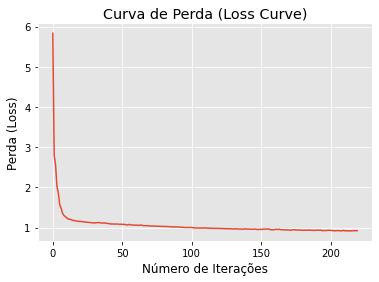

In [470]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier

# Supondo que você já tenha criado e ajustado (fit) o modelo MLPClassifier e atribuído a 'clf'

# Imprimir o número de iterações
print(clf.n_iter_)

# Criar os arrays para plotagem
x = np.arange(clf.n_iter_)
y = clf.loss_curve_

# Plotar a curva de perda (loss curve)
plt.plot(x, y)
plt.style.use("ggplot")
plt.xlabel('Número de Iterações').set_color('black')
plt.ylabel('Perda (Loss)').set_color('black')
plt.tick_params(colors='black', which='both')

plt.title('Curva de Perda (Loss Curve)')
plt.savefig('graficos/curvadeperdaRed', dpi=300, bbox_inches = "tight")
plt.show()
